In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import re
import plotly.express as px
import plotly.graph_objects as go

In [2]:
os.chdir(r'/Users/rajpa/Desktop/gc-march-2022/data')

In [3]:
old_df = pd.read_csv('dice.csv')
old_df.head(5)

,Unnamed: 0,title,company,description,location
0,0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","Reliable Software Resources Pittsburgh, PA, USA"
1,1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"DEEGIT, INC. Remote"
2,2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","Ampcus Inc Alpharetta, GA, USA"
3,3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",Blend360 Remote
4,4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"Flexion Inc Minneapolis, MN, USA"


In [4]:
old_df = old_df.drop(columns=['Unnamed: 0'])
old_df = old_df.drop_duplicates()
old_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 68
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        65 non-null     object
 1   company      65 non-null     object
 2   description  65 non-null     object
 3   location     65 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB


In [5]:
old_df['is_remote'] = np.where(old_df['location'].str.contains('Remote'),1,0)
old_df

,title,company,description,location,is_remote
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","Reliable Software Resources Pittsburgh, PA, USA",0
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"DEEGIT, INC. Remote",1
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","Ampcus Inc Alpharetta, GA, USA",0
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",Blend360 Remote,1
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"Flexion Inc Minneapolis, MN, USA",0
...,...,...,...,...,...
64,Principal Data Scientist/data science Custome...,Wizard Tech Solutions Inc,Some examples of what you'll be doing: Develop...,"Wizard Tech Solutions Inc Austin, TX, USA",0
65,"Data Scientist, Panel Science",comScore,"April 15, 2021 Data Scientist, Panel Science ...","comScore Chicago, IL, USA",0
66,ES194 Earth Science Data Specialist,ADNET Systems,ES194 Earth Scie nce Data Specialist The NASA...,"ADNET Systems Lanham, MD, USA",0
67,Head of Data Sciences,Baker Hughes Energy Services LLC,Partner with the best As Head of Data Science...,"Baker Hughes Energy Services LLC Minden, NV,...",0


In [6]:
old_df['location'] = old_df['location'].str.strip()
old_df['location'] = old_df['location'].str.split(',')

In [7]:
old_df['city'] = old_df['location'].str[0]
old_df['state'] = old_df['location'].str[1]
old_df['country'] = old_df['location'].str[2]
old_df

,title,company,description,location,is_remote,city,state,country
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","[Reliable Software Resources Pittsburgh, PA,...",0,Reliable Software Resources Pittsburgh,PA,USA
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"[DEEGIT, INC. Remote]",1,DEEGIT,INC. Remote,NaN
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","[Ampcus Inc Alpharetta, GA, USA]",0,Ampcus Inc Alpharetta,GA,USA
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",[Blend360 Remote],1,Blend360 Remote,NaN,NaN
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"[Flexion Inc Minneapolis, MN, USA]",0,Flexion Inc Minneapolis,MN,USA
...,...,...,...,...,...,...,...,...
64,Principal Data Scientist/data science Custome...,Wizard Tech Solutions Inc,Some examples of what you'll be doing: Develop...,"[Wizard Tech Solutions Inc Austin, TX, USA]",0,Wizard Tech Solutions Inc Austin,TX,USA
65,"Data Scientist, Panel Science",comScore,"April 15, 2021 Data Scientist, Panel Science ...","[comScore Chicago, IL, USA]",0,comScore Chicago,IL,USA
66,ES194 Earth Science Data Specialist,ADNET Systems,ES194 Earth Scie nce Data Specialist The NASA...,"[ADNET Systems Lanham, MD, USA]",0,ADNET Systems Lanham,MD,USA
67,Head of Data Sciences,Baker Hughes Energy Services LLC,Partner with the best As Head of Data Science...,"[Baker Hughes Energy Services LLC Minden, NV...",0,Baker Hughes Energy Services LLC Minden,NV,USA


In [8]:
old_df['city'] = old_df['city'].str.replace('remote', '')
old_df['city'] = old_df['city'].str.replace('remote or  ', '')
old_df['city'] = old_df['city'].str.replace(' or ', '') 

In [9]:
old_df

,title,company,description,location,is_remote,city,state,country
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","[Reliable Software Resources Pittsburgh, PA,...",0,Reliable Software Resources Pittsburgh,PA,USA
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"[DEEGIT, INC. Remote]",1,DEEGIT,INC. Remote,NaN
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","[Ampcus Inc Alpharetta, GA, USA]",0,Ampcus Inc Alpharetta,GA,USA
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",[Blend360 Remote],1,Blend360 Remote,NaN,NaN
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"[Flexion Inc Minneapolis, MN, USA]",0,Flexion Inc Minneapolis,MN,USA
...,...,...,...,...,...,...,...,...
64,Principal Data Scientist/data science Custome...,Wizard Tech Solutions Inc,Some examples of what you'll be doing: Develop...,"[Wizard Tech Solutions Inc Austin, TX, USA]",0,Wizard Tech Solutions Inc Austin,TX,USA
65,"Data Scientist, Panel Science",comScore,"April 15, 2021 Data Scientist, Panel Science ...","[comScore Chicago, IL, USA]",0,comScore Chicago,IL,USA
66,ES194 Earth Science Data Specialist,ADNET Systems,ES194 Earth Scie nce Data Specialist The NASA...,"[ADNET Systems Lanham, MD, USA]",0,ADNET Systems Lanham,MD,USA
67,Head of Data Sciences,Baker Hughes Energy Services LLC,Partner with the best As Head of Data Science...,"[Baker Hughes Energy Services LLC Minden, NV...",0,Baker Hughes Energy Services LLC Minden,NV,USA


In [10]:
old_df.country.value_counts()

 USA        51
 Rifkind     1
 AZ          1
 CA          1
 IL          1
 GA          1
Name: country, dtype: int64

In [11]:
old_df['country'] = old_df['country'].str.replace('AZ', 'USA')
old_df['country'] = old_df['country'].str.replace('Rifkind', 'USA')
old_df['country'] = old_df['country'].str.replace('CA', 'USA')
old_df['country'] = old_df['country'].str.replace('IL', 'USA')
old_df['country'] = old_df['country'].str.replace('GA', 'USA')
old_df.country.value_counts()

 USA    56
Name: country, dtype: int64

In [12]:
old_df['job_type'] = np.where(old_df['title'].str.contains('analy'),'Data Analyst','0')
old_df['job_type'] = np.where(old_df['title'].str.contains('engineer'),'Data Engineer',old_df['job_type'])
old_df['job_type'] = np.where(old_df['title'].str.contains('scien'),'Data Scientist',old_df['job_type'])
old_df['job_type'] = np.where(old_df['job_type'] == '0','Other',old_df['job_type'])
old_df

,title,company,description,location,is_remote,city,state,country,job_type
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","[Reliable Software Resources Pittsburgh, PA,...",0,Reliable Software Resources Pittsburgh,PA,USA,Other
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"[DEEGIT, INC. Remote]",1,DEEGIT,INC. Remote,NaN,Other
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","[Ampcus Inc Alpharetta, GA, USA]",0,Ampcus Inc Alpharetta,GA,USA,Data Scientist
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",[Blend360 Remote],1,Blend360 Remote,NaN,NaN,Other
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"[Flexion Inc Minneapolis, MN, USA]",0,Flexion Inc Minneapolis,MN,USA,Other
...,...,...,...,...,...,...,...,...,...
64,Principal Data Scientist/data science Custome...,Wizard Tech Solutions Inc,Some examples of what you'll be doing: Develop...,"[Wizard Tech Solutions Inc Austin, TX, USA]",0,Wizard Tech Solutions Inc Austin,TX,USA,Data Scientist
65,"Data Scientist, Panel Science",comScore,"April 15, 2021 Data Scientist, Panel Science ...","[comScore Chicago, IL, USA]",0,comScore Chicago,IL,USA,Other
66,ES194 Earth Science Data Specialist,ADNET Systems,ES194 Earth Scie nce Data Specialist The NASA...,"[ADNET Systems Lanham, MD, USA]",0,ADNET Systems Lanham,MD,USA,Other
67,Head of Data Sciences,Baker Hughes Energy Services LLC,Partner with the best As Head of Data Science...,"[Baker Hughes Energy Services LLC Minden, NV...",0,Baker Hughes Energy Services LLC Minden,NV,USA,Other


In [13]:
 employmenttypes = [ 'full time','part time', 'contract', 'long term', '6 months', '12 months']

old_df['employment_type'] = np.nan

for ind in old_df.index:
    desc=old_df['description'][ind]
 
    desc = re.sub("[^a-zA-Z0-12]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(desc))
    lst = ''
    for emptype in employmenttypes:
        if  re.search(emptype,desc):
            lst=lst+emptype+','
    lst = lst[:-1]
   
    if ind < len(old_df):
        old_df['employment_type'].iloc[ind]=lst

old_df.head(10)

/var/folders/v0/1p9pt23964gbzfpt4g3d3mkw0000gn/T/ipykernel_14418/3672015545.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_df['employment_type'].iloc[ind]=lst


,title,company,description,location,is_remote,city,state,country,job_type,employment_type
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","[Reliable Software Resources Pittsburgh, PA,...",0,Reliable Software Resources Pittsburgh,PA,USA,Other,long term
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"[DEEGIT, INC. Remote]",1,DEEGIT,INC. Remote,NaN,Other,
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","[Ampcus Inc Alpharetta, GA, USA]",0,Ampcus Inc Alpharetta,GA,USA,Data Scientist,
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",[Blend360 Remote],1,Blend360 Remote,NaN,NaN,Other,
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"[Flexion Inc Minneapolis, MN, USA]",0,Flexion Inc Minneapolis,MN,USA,Other,full time
5,"Manager, Data Science & Analytics","Nutrien Ag Solutions, Inc","Manager, Data Science & Analytics – Remote, US...","[Nutrien Ag Solutions, Inc Remote]",1,Nutrien Ag Solutions,Inc Remote,NaN,Other,
6,E-Discovery Data Science Advisor,"Paul, Weiss, Rifkind, Wharton & Garrison LLP",The E-Discovery Data Science Advisor uses adva...,"[Paul, Weiss, Rifkind, Wharton & Garrison L...",0,Paul,Weiss,USA,Other,
7,Data Science Lead,"Republic Services, Inc.",The Data Analytics Lead serves as the primary ...,"[Republic Services, Inc. Scottsdale, AZ, USA]",0,Republic Services,Inc. Scottsdale,USA,Other,
8,"Full Stack Engineer - (Python, Data Science a...",KLNtek,Hello Please check the below position and repl...,[KLNtek Remote],1,KLNtek Remote,NaN,NaN,Other,
9,"Data Scientist Lead (data science, Python ,Po...",SigmaWay,Apply by Email/Direct Application at Role: Da...,[SigmaWay Remote],1,SigmaWay Remote,NaN,NaN,Data Scientist,


In [14]:
old_df.employment_type.value_counts()

                      50
contract               4
long term              3
full time              3
contract,12 months     1
Name: employment_type, dtype: int64

In [15]:
experience_levels = ['associate','senior','intern','principal',
                  'director','leader','manager','specialist','entry level','machine learning'
                    ,'junior','jr','sr']

old_df['experience_level'] = np.nan
for index,level in enumerate(experience_levels):
    old_df['experience_level'] = np.where(old_df['description'].str.contains(level),level,old_df['experience_level'])
old_df.experience_level.value_counts()   

nan                 47
machine learning     7
leader               7
intern               1
sr                   1
specialist           1
associate            1
Name: experience_level, dtype: int64

In [16]:
old_df['experience_level'] =old_df['experience_level'].str.replace('sr','senior')
old_df.experience_level.value_counts() 

nan                 47
machine learning     7
leader               7
intern               1
senior               1
specialist           1
associate            1
Name: experience_level, dtype: int64

In [17]:
skills=['python','java','sql','spark','hadoop','bigdata','machine learning','hive','pig','git','nosql','aws','azure', 'power bi', 'tableau','etl','agile','relational databases','postgres','matlab','graphql','data analysis','excel','data modeling','shell scripting','gcp','cloud computing','deep learning','nlp','flask','eda']

old_df['skills'] = np.nan

for ind in old_df.index:
    desc=old_df['description'][ind]
 
    desc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(desc))
    lst = ''
    for skill in skills:
        if  re.search(skill,desc):
            lst=lst+skill+','
    lst = lst[:-1]
   
    if ind < len(old_df):
        old_df['skills'].iloc[ind]=lst

old_df.head(10)

/var/folders/v0/1p9pt23964gbzfpt4g3d3mkw0000gn/T/ipykernel_14418/736294437.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_df['skills'].iloc[ind]=lst


,title,company,description,location,is_remote,city,state,country,job_type,employment_type,experience_level,skills
0,Data Science Architect,Reliable Software Resources,"Responsibilities: Provides vision, expertise a...","[Reliable Software Resources Pittsburgh, PA,...",0,Reliable Software Resources Pittsburgh,PA,USA,Other,long term,nan,
1,Full Stack Engineer with Data Science,"DEEGIT, INC.",A full stack engineer with deep understanding ...,"[DEEGIT, INC. Remote]",1,DEEGIT,INC. Remote,NaN,Other,,machine learning,machine learning
2,Principal-Pred/Pres Analytics - Data science,Ampcus Inc,"Hello, Greetings from Ampcus Inc. Ampcus is ...","[Ampcus Inc Alpharetta, GA, USA]",0,Ampcus Inc Alpharetta,GA,USA,Data Scientist,,leader,
3,Data Science Director,Blend360,"Edit Dynamic, Fast-growing, Entrepreneurial D...",[Blend360 Remote],1,Blend360 Remote,NaN,NaN,Other,,nan,
4,Director of Data Science (3708),Flexion Inc,Flexion is currently seeking a Director of Dat...,"[Flexion Inc Minneapolis, MN, USA]",0,Flexion Inc Minneapolis,MN,USA,Other,full time,nan,
5,"Manager, Data Science & Analytics","Nutrien Ag Solutions, Inc","Manager, Data Science & Analytics – Remote, US...","[Nutrien Ag Solutions, Inc Remote]",1,Nutrien Ag Solutions,Inc Remote,NaN,Other,,nan,
6,E-Discovery Data Science Advisor,"Paul, Weiss, Rifkind, Wharton & Garrison LLP",The E-Discovery Data Science Advisor uses adva...,"[Paul, Weiss, Rifkind, Wharton & Garrison L...",0,Paul,Weiss,USA,Other,,nan,data modeling
7,Data Science Lead,"Republic Services, Inc.",The Data Analytics Lead serves as the primary ...,"[Republic Services, Inc. Scottsdale, AZ, USA]",0,Republic Services,Inc. Scottsdale,USA,Other,,leader,
8,"Full Stack Engineer - (Python, Data Science a...",KLNtek,Hello Please check the below position and repl...,[KLNtek Remote],1,KLNtek Remote,NaN,NaN,Other,,nan,
9,"Data Scientist Lead (data science, Python ,Po...",SigmaWay,Apply by Email/Direct Application at Role: Da...,[SigmaWay Remote],1,SigmaWay Remote,NaN,NaN,Data Scientist,,leader,git


### How many remote jobs are available?

In [18]:
 old_df.is_remote.value_counts()

0    55
1    10
Name: is_remote, dtype: int64

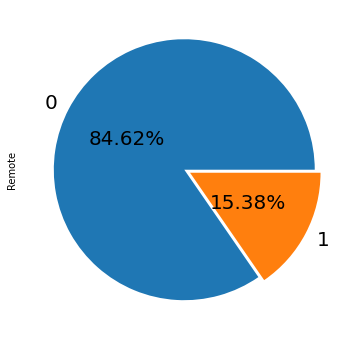

In [19]:
separate = [0, 0.05]
pie = old_df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6)) 

### How many number of jobs per state

In [20]:
old_df.state.nunique()

28

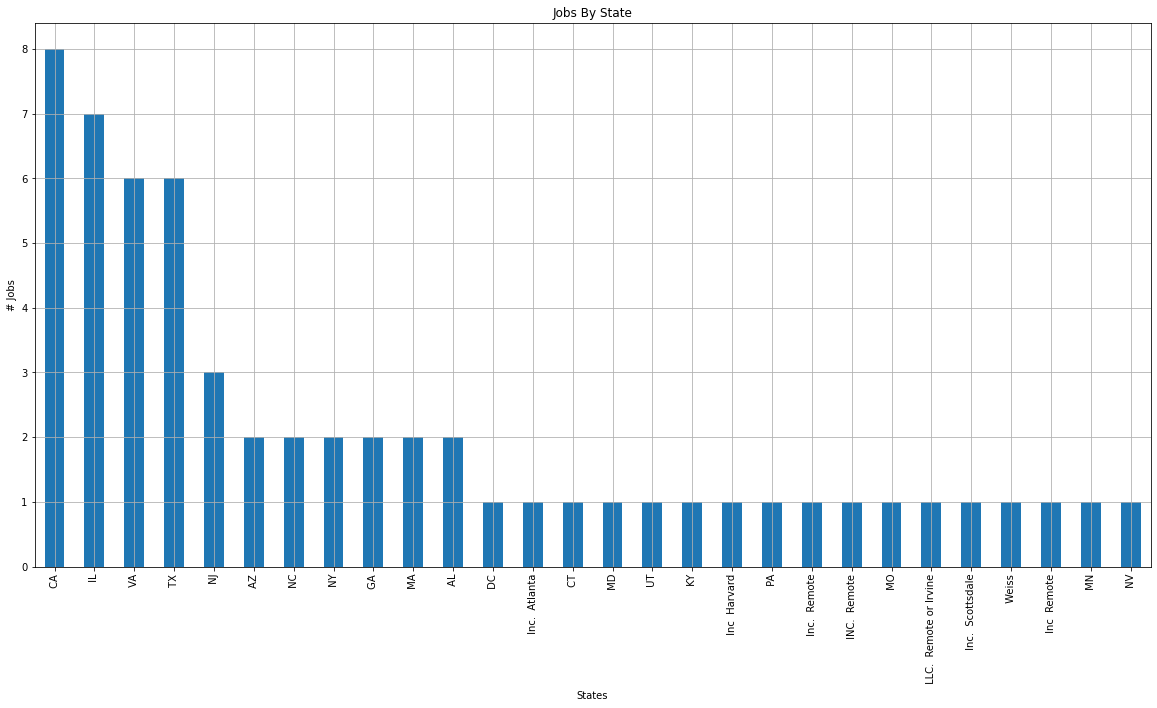

In [21]:
state_group = old_df.state.value_counts()
fig = plt.figure(figsize = (20,10))
state_group.plot.bar()
plt.title('Jobs By State')
plt.xlabel("States")
plt.ylabel("# Jobs")
plt.grid()
plt.show()

In [22]:
stateJobCount=pd.DataFrame(old_df.state.dropna(axis=0).value_counts())
stateJobCount = stateJobCount.reset_index()
stateJobCount.columns = ['state','totaljobs']
stateJobCount['state'] = stateJobCount['state'].str.upper()
stateJobCount.head()

,state,totaljobs
0,CA,8
1,IL,7
2,VA,6
3,TX,6
4,NJ,3


### Which cities have most jobs?

In [23]:
old_df.city.nunique()

60

In [24]:
city_group = old_df.city.value_counts()
city_group

Discover  Riverwoods                         3
Deloitte  Phoenix                            2
SAIC  Huntsville                             2
TransUnion  Chicago                          2
Reliable Software Resources  Pittsburgh      1
Wipro Ltd.  Louisville                       1
Cricut  RemoteSouth Jordan                   1
Datum Software                               1
Motion Recruitment  Washington               1
Motion Recruitment  San Jose                 1
Rose International  Irving                   1
Reliable Software Resources  New York        1
The Consortium Inc  Reston                   1
Tallon Recruiting & Staffing  Chantilly      1
IGNW  Boston                                 1
Motion Recruitment  Irvine                   1
SAIC  JBSA Randolph                          1
Corus Consulting  Dallas                     1
Accrete Hitech Solutions  Santa Clara        1
DISQO  Glendale                              1
OMG Technologies  Princeton                  1
Fannie Mae  R

<BarContainer object of 19 artists>

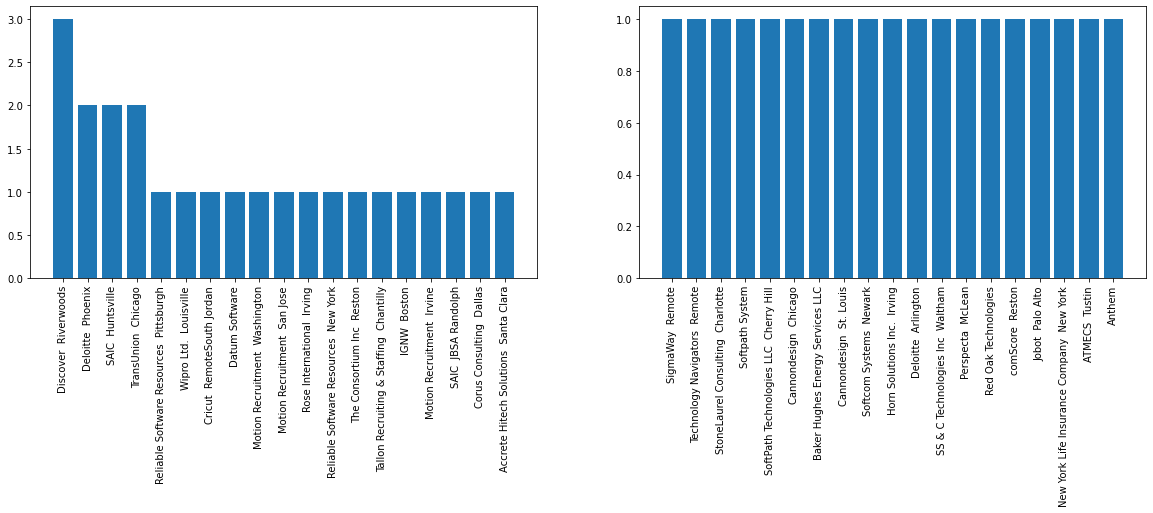

In [25]:
city_chart = plt.figure(figsize = (20,5))
c1 = city_chart.add_subplot(1,2,1)
plt.xticks(rotation = 90)
c2 = city_chart.add_subplot(1,2,2)
plt.xticks(rotation = 90)

c1.bar(city_group.iloc[0:19].index,city_group.iloc[0:19].values)
c2.bar(city_group.iloc[-20:-1].index,city_group.iloc[-20:-1].values)

/Users/rajpa/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


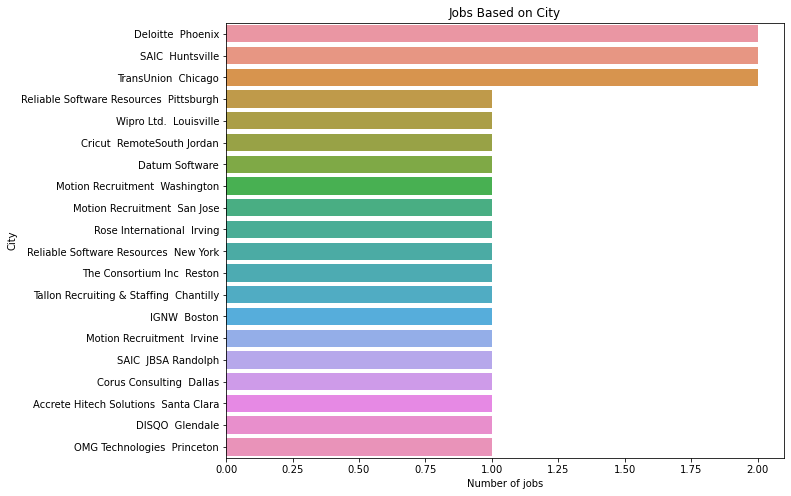

In [26]:
plt.rcParams['figure.figsize'] = 10,8
g2  = sns.barplot(old_df.city.value_counts().values[1:21], old_df.city.value_counts().index[1:21])
plt.xlabel('Number of jobs')
plt.ylabel('City')
plt.title('Jobs Based on City')
plt.show()

In [27]:
old_df.company.value_counts().head(20) 

 SAIC                                 4
 Deloitte                             4
 Discover                             3
 Motion Recruitment                   3
 Cannondesign                         3
 Reliable Software Resources          2
 TransUnion                           2
 comScore                             2
 Baker Hughes Energy Services LLC     2
 DISQO                                2
 Accrete Hitech Solutions             1
 Datum Software, Inc.                 1
 Infinity Tech Group Inc              1
 Wizard Tech Solutions Inc            1
 Fiserv                               1
 Boehringer Ingelheim                 1
 Wipro Ltd.                           1
 Cricut                               1
 Fannie Mae                           1
 Corus Consulting                     1
Name: company, dtype: int64

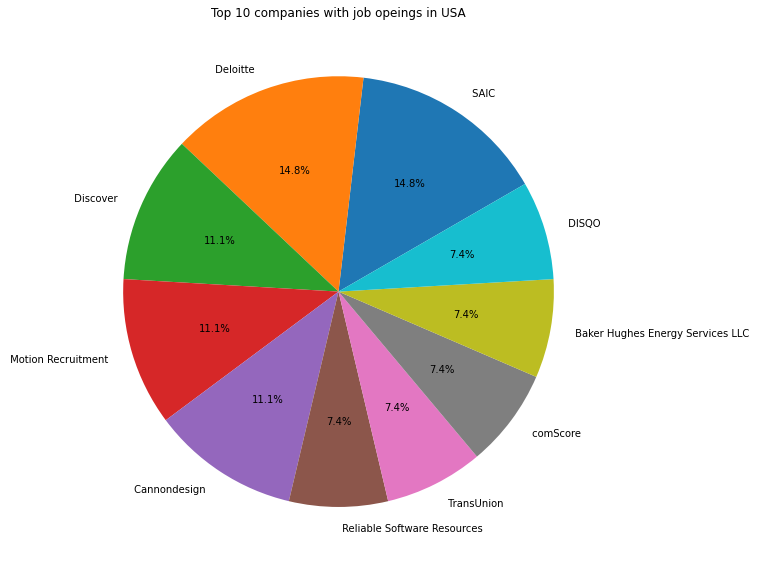

In [28]:
plt.pie(old_df.company.value_counts()[:10], autopct='%1.1f%%', startangle=30, labels=old_df.company.value_counts().index[:10])
plt.title('Top 10 companies with job opeings in USA')
plt.tight_layout()
plt.show()

### What are the statistics of job categories? Data analyst, Data Engineering, Data Scientist

In [29]:
 job_count = pd.DataFrame(old_df.groupby('title').size().sort_values(ascending = False).rename('count').reset_index()) 

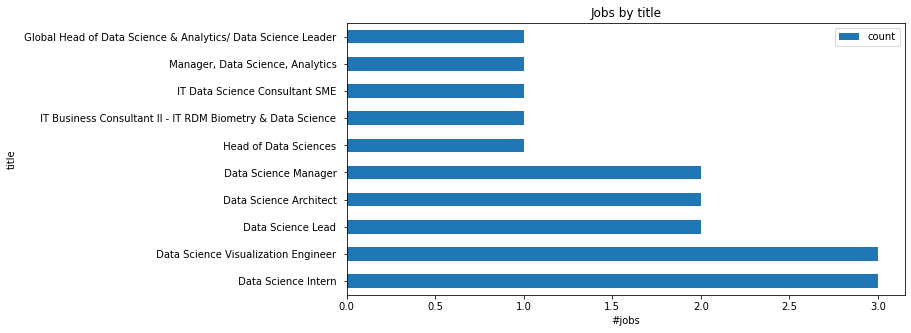

In [30]:
job_count[:10].plot(x = 'title',y = 'count', kind = 'barh',figsize = (10,5))
plt.xlabel('#jobs')
plt.ylabel('title')
plt.title('Jobs by title')
plt.show()

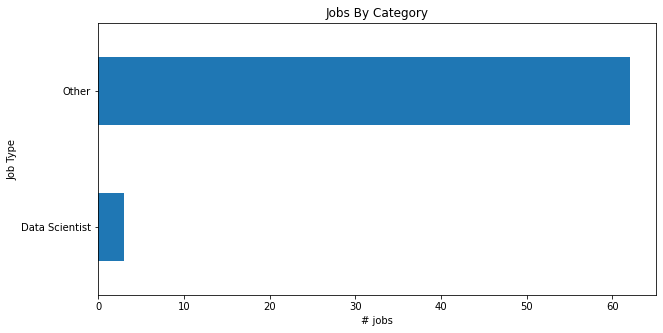

In [31]:
fig = plt.figure(figsize = (10,5))
old_df.job_type.value_counts(ascending=True).plot.barh()
plt.title('Jobs By Category')
plt.xlabel("# jobs")
plt.ylabel("Job Type")
plt.show()

In [32]:
result = old_df.skills.str.split(',',expand=True).stack().value_counts().reset_index()
result.columns = ['Word','Frequency']

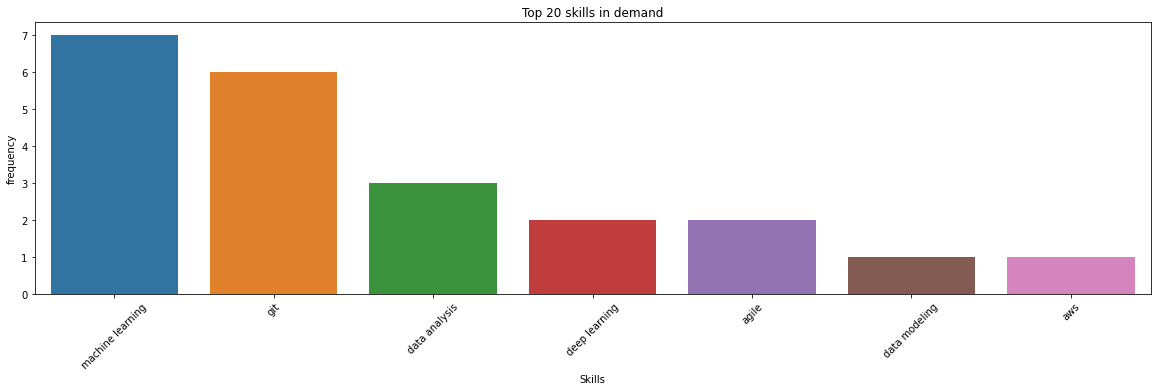

In [33]:
fig= plt.figure(figsize=(20,5))
g2  = sns.barplot(x=result.Word.values[1:21], y=result.Frequency.values[1:21])
plt.xlabel('Skills')
plt.xticks(rotation = 45)
plt.ylabel('frequency')
plt.title('Top 20 skills in demand')
plt.show()

In [34]:
 result = old_df.employment_type.str.split(',',expand=True).stack().value_counts().reset_index()
result.columns = ['Word','Frequency']
result

,Word,Frequency
0,,50
1,contract,5
2,long term,3
3,full time,3
4,12 months,1


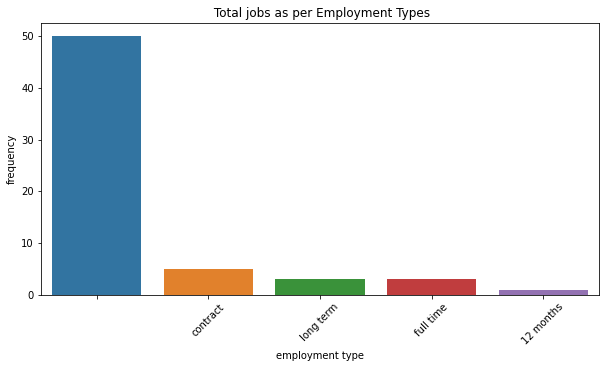

In [35]:
fig= plt.figure(figsize=(10,5))
g2  = sns.barplot(x=result.Word.values[0:5], y=result.Frequency.values[0:5])
plt.xlabel('employment type')
plt.xticks(rotation = 45)
plt.ylabel('frequency')
plt.title(' Total jobs as per Employment Types')
plt.show()